# 1. Import libreries

In [92]:

import statistics as stat
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,recall_score,precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# 2.  Load and drop useless columns

In [93]:
df_bank = pd.read_csv("BankChurners.csv")

In [94]:
df_bank.drop(['CLIENTNUM', 'Unnamed: 21'], axis = 'columns', inplace=True)

# 3. exploding, search null, duplicates and modify some columns 

## 3.1 Shape of data

In [95]:
df_bank.shape

(10127, 20)

## 3.2 Types of data

In [96]:
df_bank.dtypes                     

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

## 3.3 Statistical data

### 3.3.1 Numerical values

In [97]:
df_bank.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### 3.3.2 Categorical values

In [98]:
df_bank.describe(include=[object])  

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## 3.4 looking for null values

In [99]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [100]:
df_bank.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## 3.5 Looking for duplicate values

In [101]:
df_bank.duplicated().sum()

0

## 3.6 Modify some columns 

In [102]:
df_bank["Attrition_Flag"]=df_bank["Attrition_Flag"].map({'Existing Customer': 0, 'Attrited Customer': 1})
df_bank["Gender"]=df_bank["Gender"].map({'M': 1, 'F': 0})

# 4. EDA

## 4.1 Attrition_Flag / dependent variable

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Count'>

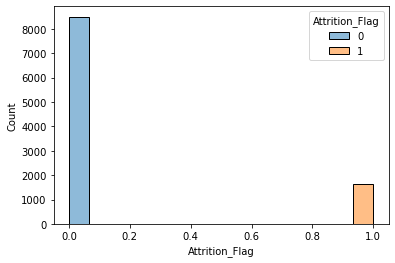

In [103]:
sns.histplot(x= df_bank["Attrition_Flag"], hue = df_bank["Attrition_Flag"])

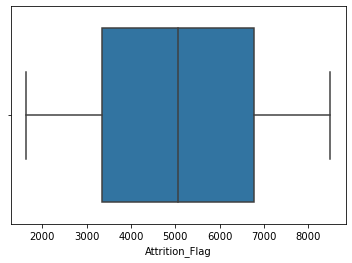

In [104]:
sns.boxplot(x=df_bank["Attrition_Flag"].value_counts())
plt.show()

## 4.2 Customer_Age

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

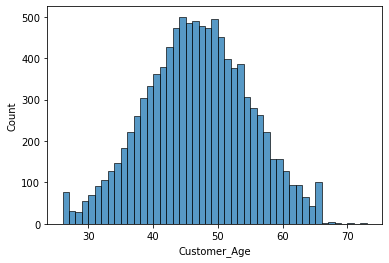

In [105]:
sns.histplot(x= df_bank["Customer_Age"])

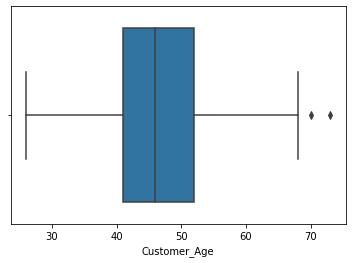

In [106]:
sns.boxplot(x=df_bank["Customer_Age"])
plt.show()

In [107]:
# this feature has a good distribution and also has a some outliers, maybe in the nexts coding we could get thmen out

## 4.3 Gender

<AxesSubplot:xlabel='Gender', ylabel='Count'>

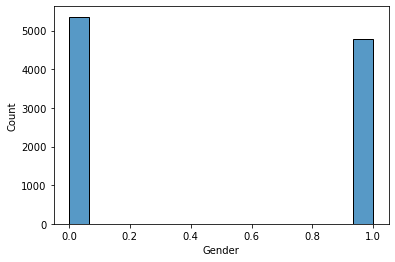

In [108]:
sns.histplot(x= df_bank["Gender"])

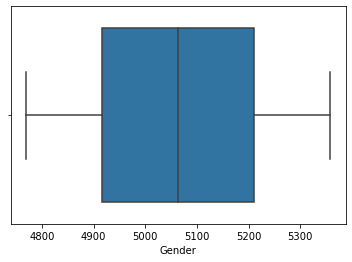

In [109]:
sns.boxplot(x=df_bank["Gender"].value_counts())
plt.show()

In [110]:
# this feuture has a normal behavior 

## 4.4 Dependent_count

<AxesSubplot:xlabel='Dependent_count', ylabel='Count'>

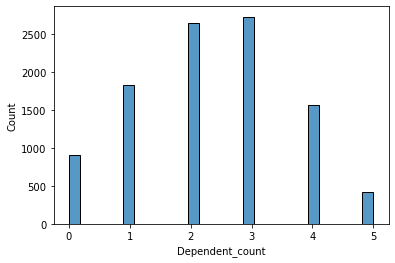

In [111]:
sns.histplot(x= df_bank["Dependent_count"])

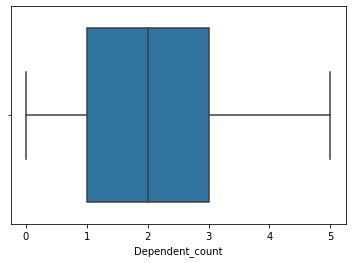

In [112]:
sns.boxplot(x=df_bank["Dependent_count"])
plt.show()

In [113]:
# this variable has a good behavior too its distribution is like a normal distribution 

## 4.5 Marital_Status

<AxesSubplot:xlabel='Marital_Status', ylabel='Count'>

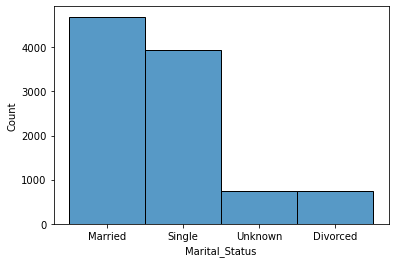

In [114]:
sns.histplot(x= df_bank["Marital_Status"])

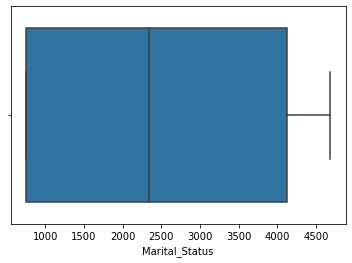

In [115]:
sns.boxplot(x=df_bank["Marital_Status"].value_counts())
plt.show()

In [116]:
# this categorial feature has skewness to the left. we need to transfort to numerical data like standardization or normalization

## 4.6 Education_Level

<AxesSubplot:xlabel='Education_Level', ylabel='Count'>

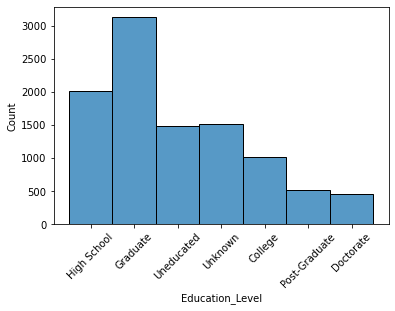

In [117]:
sns.histplot(x= df_bank["Education_Level"])
plt.xticks(rotation=45)
sns.histplot()

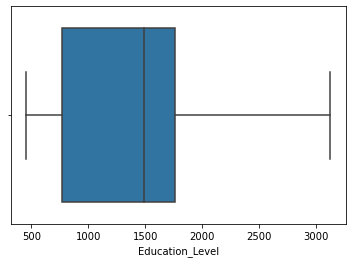

In [118]:
sns.boxplot(x=df_bank["Education_Level"].value_counts())
plt.show()

In [119]:
# also this categorial feature has skewness to the right. we need to transfort to numerical data like standardization or normalization

##  4.7 Income_Category

<AxesSubplot:xlabel='Income_Category', ylabel='Count'>

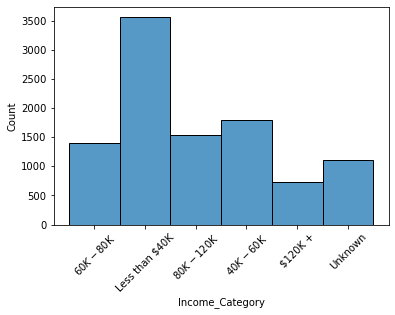

In [120]:
sns.histplot(x= df_bank["Income_Category"])
plt.xticks(rotation=45)
sns.histplot()

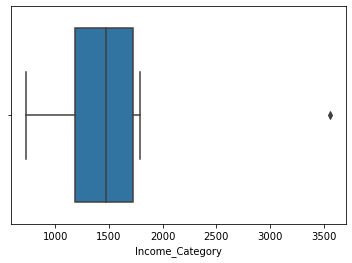

In [121]:
sns.boxplot(x=df_bank["Income_Category"].value_counts())
plt.show()

In [122]:
# this feuture has a kurtosis casuse has many values in the category "less than $40k" maybe need a transformation and  and remove the outlier

## 4.8 Months_on_book

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

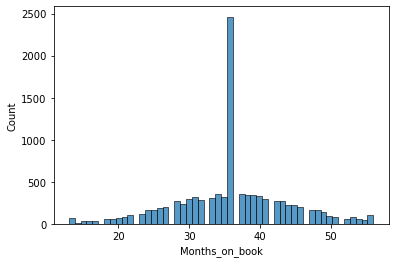

In [123]:
sns.histplot(x= df_bank["Months_on_book"])

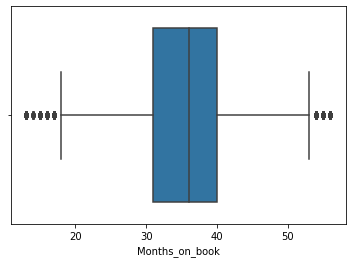

In [124]:
sns.boxplot(x=df_bank["Months_on_book"])
plt.show()

In [125]:
# this feature has a more pronounced kurtosis and outliers

## 4.9 Total_Relationship_Count


<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Count'>

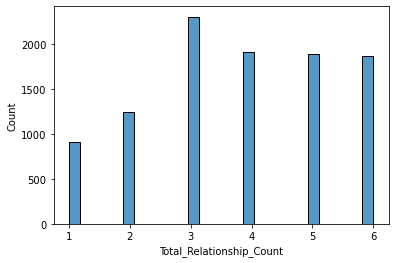

In [126]:
sns.histplot(x= df_bank["Total_Relationship_Count"])

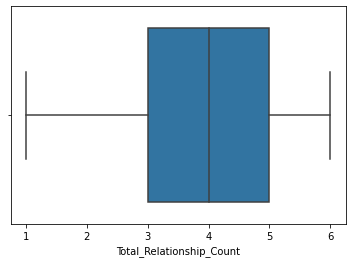

In [127]:
sns.boxplot(x=df_bank["Total_Relationship_Count"])
plt.show()

In [128]:
# this feature its distribution is similar to uniform distribution and dont has outliers

## 4.10 Months_Inactive_12_mon

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Count'>

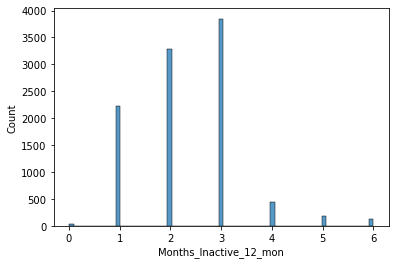

In [129]:
sns.histplot(x= df_bank["Months_Inactive_12_mon"])

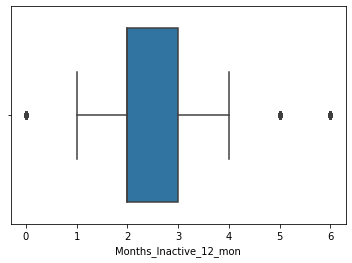

In [130]:
sns.boxplot(x=df_bank["Months_Inactive_12_mon"])
plt.show()

In [131]:
# we can see in the distrbution that there are concentrated values this produces outliers 

## 4.11 Contacts_Count_12_mon

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Count'>

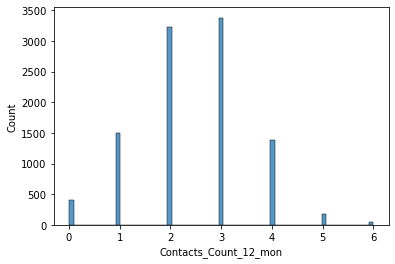

In [132]:
sns.histplot(x= df_bank["Contacts_Count_12_mon"])

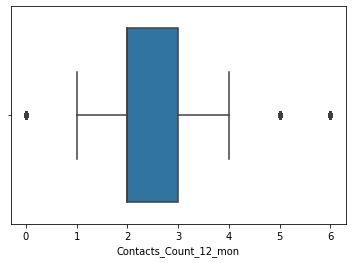

In [133]:
sns.boxplot(x=df_bank["Contacts_Count_12_mon"])
plt.show()

In [134]:
# In this case the distribution will behave like a normal distribution but it also has outliers 

## 4.12 Credit_Limit

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

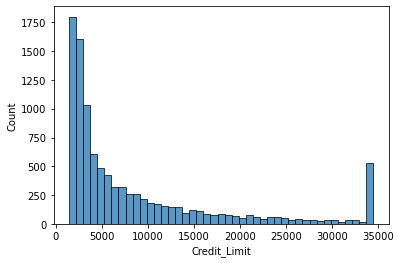

In [135]:
sns.histplot(x= df_bank["Credit_Limit"])

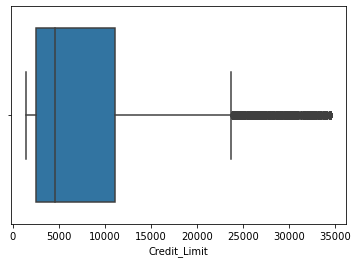

In [136]:
sns.boxplot(x=df_bank["Credit_Limit"])
plt.show()

In [137]:
# This feature has left skewness and several outliers.

## 4.13 Total_Revolving_Bal

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

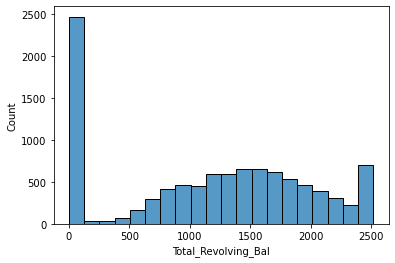

In [138]:
sns.histplot(x= df_bank["Total_Revolving_Bal"])

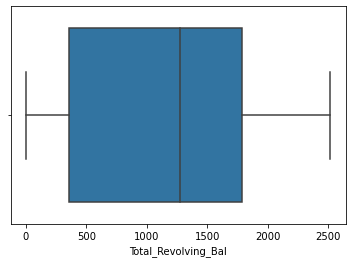

In [139]:
sns.boxplot(x=df_bank["Total_Revolving_Bal"])
plt.show()

In [140]:
# this feature has the values concentrated in one value but the rest of the values behave in a similar way

## 4.14 Avg_Open_To_Buy

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Count'>

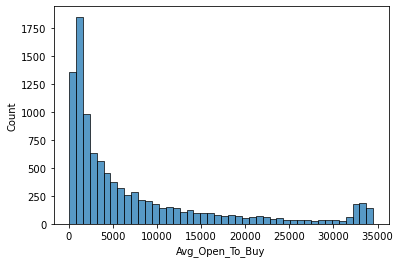

In [141]:
sns.histplot(x= df_bank["Avg_Open_To_Buy"])

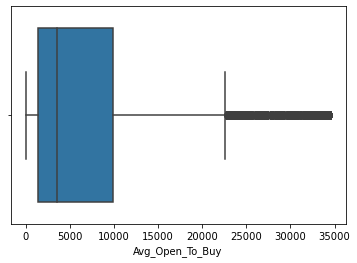

In [142]:
sns.boxplot(x=df_bank["Avg_Open_To_Buy"])
plt.show()

In [143]:
# this characteristic has asymmetry to the left and decreases strongly. this produces several outliers

## 4.15 Total_Amt_Chng_Q4_Q1

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

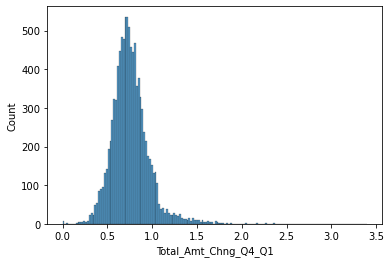

In [144]:
sns.histplot(x= df_bank["Total_Amt_Chng_Q4_Q1"])

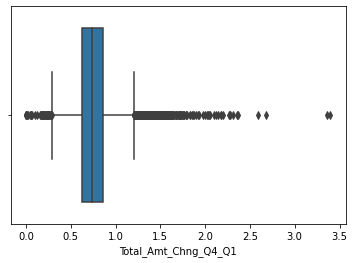

In [145]:
sns.boxplot(x=df_bank["Total_Amt_Chng_Q4_Q1"])
plt.show()

In [146]:
# This variable presents kurtosis because its data are concentrated and it has some values that escape from the center of the distribution
# so they are many outliers.

## 4.16 Total_Trans_Amt

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

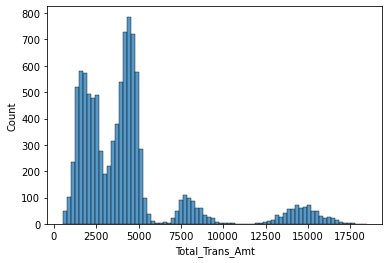

In [147]:
sns.histplot(x= df_bank["Total_Trans_Amt"])

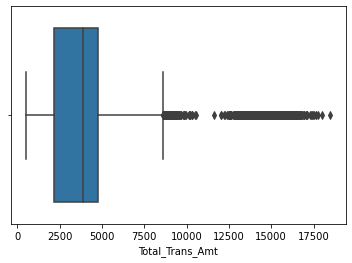

In [148]:
sns.boxplot(x=df_bank["Total_Trans_Amt"])
plt.show()

In [149]:
#distrubicun casi bimodal y con muchos varlores atipicos

## 4.17 Total_Trans_Ct

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

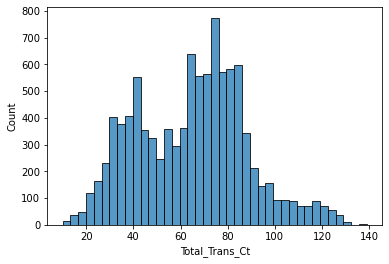

In [150]:
sns.histplot(x= df_bank["Total_Trans_Ct"])

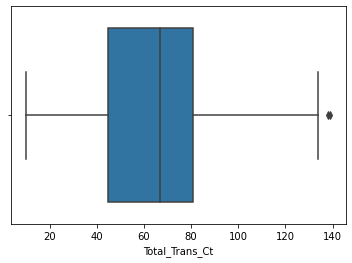

In [151]:
sns.boxplot(x=df_bank["Total_Trans_Ct"])
plt.show()

In [152]:
#This variable has a distribution similar to a normal one, it is concentrated in the center and it does not present as many outliers.


## 4.18 Total_Ct_Chng_Q4_Q1

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

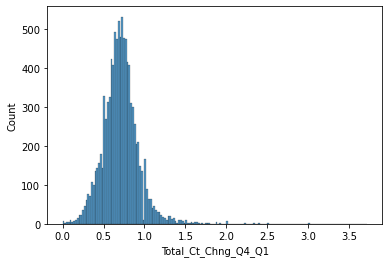

In [153]:
sns.histplot(x= df_bank["Total_Ct_Chng_Q4_Q1"])

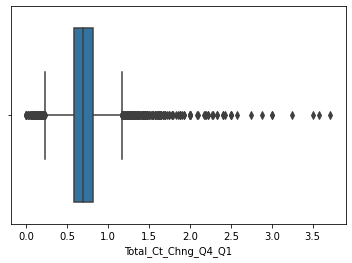

In [154]:
sns.boxplot(x=df_bank["Total_Ct_Chng_Q4_Q1"])
plt.show()

In [155]:
# This variable presents kurtosis because its data are concentrated in the left and it has some values that escape from the center of the distribution
# so they are many outliers

## 4.19 Avg_Utilization_Ratio

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

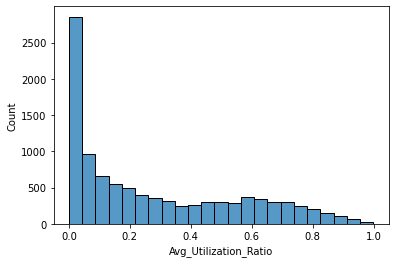

In [156]:
sns.histplot(x= df_bank["Avg_Utilization_Ratio"])


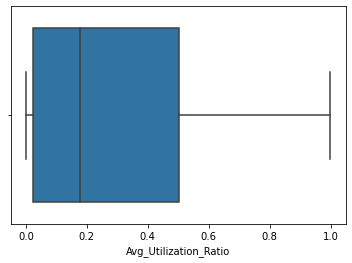

In [157]:
sns.boxplot(x=df_bank["Avg_Utilization_Ratio"])
plt.show()

In [158]:
# this feature has most of its data concentrated in one value. left skew present

## 4.20 Correlations

In [159]:
matriz = df_bank.corr(method="spearman")

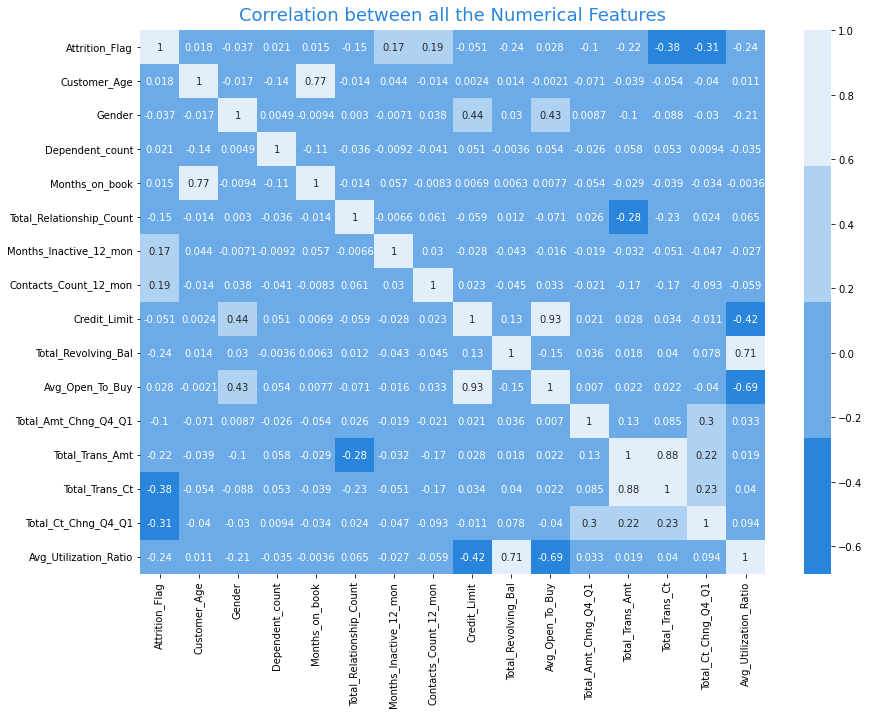

In [160]:
plt.figure(figsize=[14,10])
plt.title("Correlation between all the Numerical Features", size=18, pad=10, color='#2985dc')
sns.heatmap(matriz, cmap=['#2985dc', '#6cabe7','#b0d2f2','#e2effa'], annot=True)
plt.show()

In [161]:
#Credit_limit and Avg_open_to_buy → 0.93
#Total_trans_ct and Total_trans_ame → 0.88
#Customer_age and Months_om_book → 0.77
#Total_revolving_bal and Avg_utilizacion_radio → 0.71
#Avg_open_to_buy and Avg_utilizacion_radio → -0.69

In [162]:
matriz = df_bank.corr(method="pearson")

In [163]:
 matriz["Attrition_Flag"].sort_values(ascending=False)

Attrition_Flag              1.000000
Contacts_Count_12_mon       0.204491
Months_Inactive_12_mon      0.152449
Dependent_count             0.018991
Customer_Age                0.018203
Months_on_book              0.013687
Avg_Open_To_Buy            -0.000285
Credit_Limit               -0.023873
Gender                     -0.037272
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Relationship_Count   -0.150005
Total_Trans_Amt            -0.168598
Avg_Utilization_Ratio      -0.178410
Total_Revolving_Bal        -0.263053
Total_Ct_Chng_Q4_Q1        -0.290054
Total_Trans_Ct             -0.371403
Name: Attrition_Flag, dtype: float64

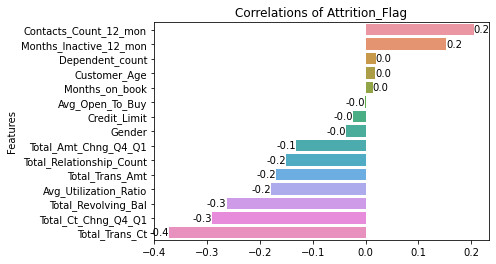

In [164]:
df = pd.DataFrame.from_dict(data = {'Features': ["Contacts_Count_12_mon", "Months_Inactive_12_mon", "Dependent_count", "Customer_Age","Months_on_book","Avg_Open_To_Buy","Credit_Limit","Gender","Total_Amt_Chng_Q4_Q1","Total_Relationship_Count","Total_Trans_Amt","Avg_Utilization_Ratio","Total_Revolving_Bal","Total_Ct_Chng_Q4_Q1","Total_Trans_Ct"],'win_corr': [0.204491, 0.152449, 0.018991, 0.018203,0.013687,-0.000285,-0.023873,-0.037272,-0.131063,-0.150005,-0.168598,-0.178410,-0.263053,-0.290054,-0.371403]})

ax = sns.barplot(df.win_corr.values,df.Features, orient='h') 
  
ax.set_xlabel('')
plt.title('Correlations of Attrition_Flag')
ax.bar_label(ax.containers[0], fmt= '%0.1f' )
plt.show()

In [165]:
# No significant relationships are appreciated with the variable that is sought to be predicted.

# 5. Split data for training and test 

## 5.1 Split in study variable and features

In [166]:
target = df_bank["Attrition_Flag"]

data = df_bank.drop(columns=["Attrition_Flag"])

In [167]:
data

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,1,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,0,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,1,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## 5.2 Split in training data and test data

In [168]:
datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(data,target,test_size=0.30,random_state=41)


## 5.3 Data balance

In [169]:
smote = SMOTE()

In [170]:
datos_entrena_num =pd.get_dummies(data=datos_entrena, drop_first=True)

datos_entrena_balance, clase_entrena_balance = smote.fit_resample(datos_entrena_num, clase_entrena)

In [171]:
datos_prueba_num =pd.get_dummies(data=datos_prueba, drop_first=True)

In [172]:
datos_prueba_balance, clase_prueba_balance = smote.fit_resample(datos_prueba_num, clase_prueba)

# 6. Applying models

## 6.1 Logistict Regresion

### 6.1.1 Call the model

In [173]:
logistict = LogisticRegression()

### 6.1.2 Training model

In [174]:
logistict.fit(datos_prueba_balance, clase_prueba_balance) 

LogisticRegression()

### 6.1.3 Make predictions

In [175]:
pred_logistict = logistict.predict(datos_prueba_balance)

### 6.1.4 Metrics

#### 6.1.4.1 Score

In [176]:
accuracy = logistict.score(datos_prueba_balance, clase_prueba_balance)
accuracy

0.8107789142407553

#### 6.1.4.2 Accuracy_score

In [177]:
acc = accuracy_score(clase_prueba_balance,pred_logistict)
acc

0.8107789142407553

#### F1_score

In [178]:
f1 = f1_score(clase_prueba_balance,pred_logistict, average= "macro")
f1

0.810777860039915

#### 6.1.4.2 Classification_report

In [179]:
x_logist= classification_report(clase_prueba_balance,pred_logistict)
print(x_logist)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2542
           1       0.81      0.81      0.81      2542

    accuracy                           0.81      5084
   macro avg       0.81      0.81      0.81      5084
weighted avg       0.81      0.81      0.81      5084



#### 6.1.4.3 CV

In [180]:
scores_logistict = cross_val_score(logistict,datos_entrena_balance, clase_entrena_balance, cv=10, scoring="f1_macro")
scores_logistict.mean()

0.8077825793490092

#### 6.1.4.4 Confusion matrix

#### Function to display matrix

In [181]:
def matriz_de_confusion(clases_reales, clases_predichas, titulo):
   
    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)
    precision = precision_score(clases_reales, clases_predichas)
    recall = recall_score(clases_reales, clases_predichas)
    f1 = f1_score(clases_reales, clases_predichas,average="macro")

    
    plt.figure(figsize=(4, 4))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : Existing ", "1 : Attrited "]) 
    plt.matshow(matriz, cmap="summer", vmin=0, vmax=20, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("True\nnegative", "False\npositive"), 
                 ("False\nnegative", "True\npositive"))
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(2.1, 1.00, "F1_Macro: %0.2f" % f1, fontsize=20)
    
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.show()

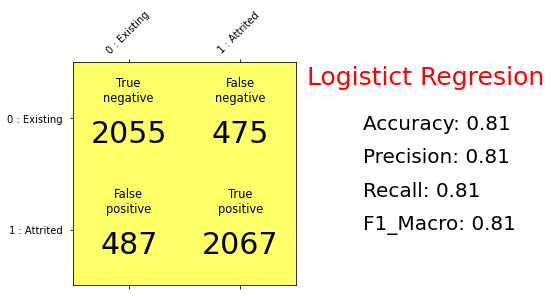

In [182]:
matriz_de_confusion(clase_prueba_balance,pred_logistict,"Logistict Regresion")

#### 6.1.4.5 Roc curve

In [183]:
r_probs = [0 for _ in range(len(clase_prueba_balance))]
logistict_probs = logistict.predict_proba(datos_prueba_balance)

In [184]:
logistict_probs = logistict_probs[:, 1]

In [185]:
r_auc = roc_auc_score(clase_prueba_balance, r_probs)
logistict_auc = roc_auc_score(clase_prueba_balance, logistict_probs)

In [186]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logist Regresion : AUROC = %.3f' % (logistict_auc))

Random (chance) Prediction: AUROC = 0.500
Logist Regresion : AUROC = 0.890


In [187]:
r_fpr, r_tpr, _ = roc_curve(clase_prueba_balance, r_probs)
logistict_fpr, logistict_tpr, _ = roc_curve(clase_prueba_balance, logistict_probs)

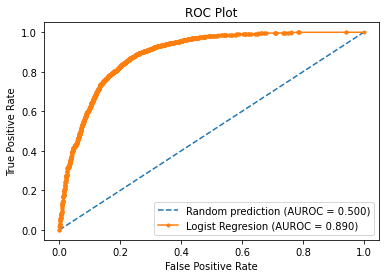

In [188]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(logistict_fpr, logistict_tpr, marker='.', label='Logist Regresion (AUROC = %0.3f)' % logistict_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## 6.2 Decision Tree

### 6.2.1 Call model

In [189]:
dec = DecisionTreeClassifier()

### 6.2.2 Training model

In [190]:
decision_tree=dec.fit(datos_entrena_balance, clase_entrena_balance)

### 6.2.3 Make predictions

In [191]:
pred_dec = dec.predict(datos_prueba_balance)

### 6.2.4 Metrics

#### 6.2.4.1 Score

In [192]:
accuracy = dec.score(datos_prueba_balance, clase_prueba_balance)
accuracy


0.9124704956726987

#### 6.2.4.2 Accuracy_score

In [193]:
acc = accuracy_score(clase_prueba_balance,pred_dec)
acc

0.9124704956726987

#### 6.2.4.3 F1_score

In [194]:
f1 = f1_score(clase_prueba_balance,pred_dec, average= None)
f1

array([0.91509254, 0.90968135])

#### 6.2.4.4 Classification_report

In [195]:
x= classification_report(clase_prueba_balance,pred_dec)
print(x)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2542
           1       0.94      0.88      0.91      2542

    accuracy                           0.91      5084
   macro avg       0.91      0.91      0.91      5084
weighted avg       0.91      0.91      0.91      5084



#### 6.2.4.5 CV

In [196]:
scores_tree = cross_val_score(dec,datos_entrena_balance, clase_entrena_balance, cv=10, scoring="f1_macro")

In [197]:
print(scores_tree)

[0.89841207 0.90748372 0.95972429 0.97482874 0.96559703 0.94714136
 0.95633228 0.9706029  0.96387867 0.95212756]


In [198]:
scores_tree.mean()

0.9496128624108952

#### 6.2.4.6 Confusion matriz

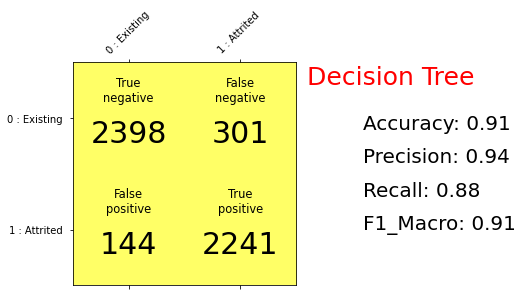

In [199]:
matriz_de_confusion(clase_prueba_balance,pred_dec,"Decision Tree")

#### 6.2.4.7 Roc curve

In [200]:
r_probs = [0 for _ in range(len(clase_prueba_balance))]
dec_probs = dec.predict_proba(datos_prueba_balance)

In [201]:
rf_probs = dec_probs[:, 1]

In [202]:
r_auc = roc_auc_score(clase_prueba_balance, r_probs)
dec_auc = roc_auc_score(clase_prueba_balance, rf_probs)

In [203]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision Tree: AUROC = %.3f' % (dec_auc))

Random (chance) Prediction: AUROC = 0.500
Decision Tree: AUROC = 0.912


In [204]:
r_fpr, r_tpr, _ = roc_curve(clase_prueba_balance, r_probs)
dec_fpr, dec_tpr, _ = roc_curve(clase_prueba_balance, rf_probs)

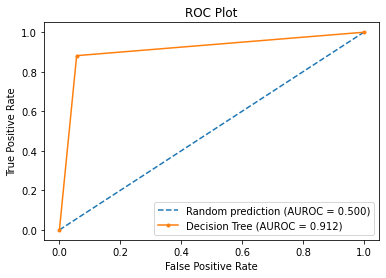

In [205]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dec_fpr, dec_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dec_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## 6.3 XGBOOST

## 6.3.1 Call model

In [206]:
xgb = xgb.XGBClassifier()

## 6.3.2 Training model

In [207]:
xgb.fit(datos_entrena_balance, clase_entrena_balance)

[15:00:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 6.3.3 Make predictions

In [208]:
pred_xgb = xgb.predict(datos_prueba_balance)

### 6.3.4 Metrics

#### 6.3.4.1 Score

In [209]:
accuracy_xgb = xgb.score(datos_prueba_balance, clase_prueba_balance)
accuracy

0.9124704956726987

#### 6.3.4.2 Accuracy_score

In [210]:
acc = accuracy_score(clase_prueba_balance,pred_xgb)
acc

0.971675845790716

#### 6.3.4.3 F1_score

In [211]:
f1 = f1_score(clase_prueba_balance,pred_xgb, average= None)
f1

array([0.97191888, 0.97142857])

#### 6.3.4.4 Classification_report

In [212]:
x= classification_report(clase_prueba_balance,pred_xgb)
print(x)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2542
           1       0.98      0.96      0.97      2542

    accuracy                           0.97      5084
   macro avg       0.97      0.97      0.97      5084
weighted avg       0.97      0.97      0.97      5084



#### 6.3.4.5 CV

In [213]:
scores_xgb = cross_val_score(xgb,datos_entrena_balance, clase_entrena_balance, cv=10, scoring="f1_macro")
scores_xgb.mean()

[15:00:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

0.9818630330343515

In [214]:
print(scores_xgb)

[0.95212996 0.95043271 0.99412731 0.98909334 0.98657533 0.9848978
 0.98572431 0.99496213 0.98908403 0.9916034 ]


In [215]:
scores_xgb.mean()

0.9818630330343515

#### 6.3.4.6 Confusion matrix

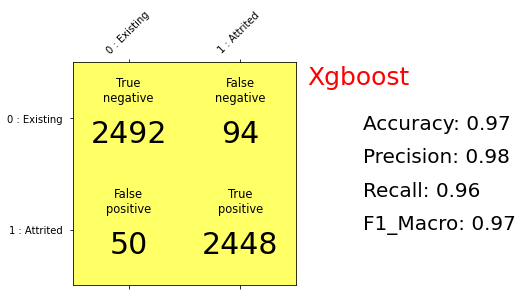

In [216]:
matriz_de_confusion(clase_prueba_balance,pred_xgb,"Xgboost")

#### 6.3.4.7 Roc curve

Random (chance) Prediction: AUROC = 0.500
Xgbosst: AUROC = 0.997


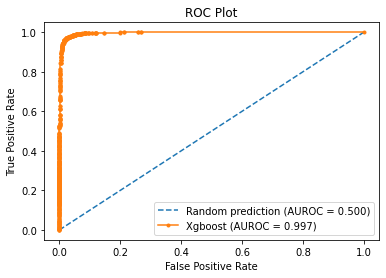

In [217]:
r_probs = [0 for _ in range(len(clase_prueba_balance))]
xgb_probs = xgb.predict_proba(datos_prueba_balance)
xgb_probs = xgb_probs[:, 1]
r_auc = roc_auc_score(clase_prueba_balance, r_probs)
xgb_auc = roc_auc_score(clase_prueba_balance, xgb_probs)
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Xgbosst: AUROC = %.3f' % (xgb_auc))
r_fpr, r_tpr, _ = roc_curve(clase_prueba_balance, r_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(clase_prueba_balance, xgb_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % xgb_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## 6.4 All roc curves together

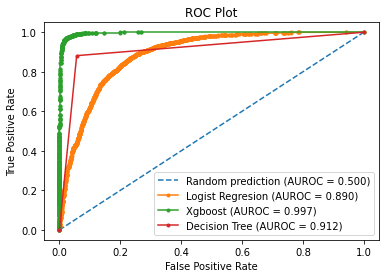

In [218]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(logistict_fpr, logistict_tpr, marker='.', label='Logist Regresion (AUROC = %0.3f)' % logistict_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % xgb_auc)
plt.plot(dec_fpr, dec_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dec_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
# Show legend
plt.legend() # 
# Show plot
plt.show()

# 7. Tunning Xgboost

## 7.1 Parameters

In [219]:
parametros = {
                'max_depth' : [2,3,5,10,15],
                'subsample' : [0.1, 0.3, 0.5,0.8,1],
                'colsample_bytree'  : [0.1,0.5,1],
                'min_child_weight' : [1,2,3,4],
                'n_estimators' : [100,500, 900, 1100,1500],
                'learning_rate' : [0.05,0.1,0.15,0.20]              
}

## 7.2 Apply RandomizedSearchCV

In [220]:
warnings.filterwarnings("ignore")
random_cv = RandomizedSearchCV(xgb,parametros2,cv=5,scoring="f1_macro", n_iter=5)
#random_cv = RandomizedSearchCV(xgb,parametros2,cv=5,scoring="neg_mean_absolute_error", n_iter=50,n_jobs =4,verbose=5,return_train_score=True,random_state=42)
fit_obj = random_cv.fit(datos_entrena_balance, clase_entrena_balance)
print(fit_obj.cv_results_['mean_test_score'])
best_model = fit_obj.best_estimator_

NameError: name 'parametros2' is not defined

## 7.3 Training best model

In [ ]:
best_model.fit(datos_entrena_balance, clase_entrena_balance)
print(best_model.score(datos_entrena_balance, clase_entrena_balance))
print(best_model.score(datos_prueba_balance, clase_prueba_balance))
warnings.filterwarnings("ignore")


In [ ]:
pred_xgb_best = best_model.predict(datos_prueba_balance)

## 7.4 Metrics for the best model

### 7.4.1 Confusion matriz

In [ ]:
matriz_de_confusion(clase_prueba_balance,pred_xgb_best,"Best Xgboost")

### 7.4.2 Roc curve

In [ ]:
r_probs = [0 for _ in range(len(clase_prueba_balance))]
xgb_probs = best_model.predict_proba(datos_prueba_balance)
xgb_probs = xgb_probs[:, 1]
r_auc = roc_auc_score(clase_prueba_balance, r_probs)
xgb_auc = roc_auc_score(clase_prueba_balance, xgb_probs)
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Xgbosst: AUROC = %.3f' % (xgb_auc))

r_fpr, r_tpr, _ = roc_curve(clase_prueba_balance, r_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(clase_prueba_balance, xgb_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % xgb_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## 7.4 Features importances

In [ ]:
features_to_plot = 15

importances = best_model.feature_importances_
indices = np.argsort(importances)

best_vars = np.array(datos_entrena_balance.columns )[indices][-features_to_plot:]
values = importances[indices][-features_to_plot:]
best_vars

y_ticks = np.arange(0, features_to_plot)
fig, ax = plt.subplots(figsize=(16,8))
ax.barh(y_ticks, values, color=['#2985dc', '#6cabe7','#b0d2f2','#e2effa'])
ax.set_yticklabels(best_vars, size=12)
ax.set_yticks(y_ticks)
ax.set_title("XGBClassifer Feature Importances", size=25, pad=20, color='#2985dc')
ax.bar_label(ax.containers[0], size="10")
fig.tight_layout()
plt.grid(False)
plt.show()